# Kinetic Model for Potassium Channel Kv4.2

In [3]:
%clear
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import odeint

%matplotlib inline

mpl.rcParams['figure.dpi']=100
mpl.rcParams['figure.titlesize']=20
mpl.rcParams['axes.facecolor']='white'        
mpl.rcParams['lines.linewidth']=2.0
mpl.rcParams['axes.linewidth']=2.0
mpl.rcParams['xtick.major.pad']=6
mpl.rcParams['ytick.major.pad']=6
mpl.rcParams['xtick.labelsize']=14
mpl.rcParams['ytick.labelsize']=14
mpl.rcParams['axes.titlesize']=18
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['axes.grid']='True'
mpl.rcParams['axes.axisbelow']='line'
mpl.rcParams['legend.fontsize']=12

## Lin model for IV series

### Wild Type

In [4]:
def ode_Lin_model_WT (C, t, p):
    C0=C[0]
    C1=C[1]
    C2=C[2]
    C3=C[3]
    C4=C[4]
    I0=C[5]
    I1=C[6]
    I2=C[7]
    I3=C[8]
    I4=C[9]
    O=C[10]

    
    #constants
    
    T = 291.0 #K or 18 degree celsius
    e =  1.602176634 * (10**-19.0) # C
    K_B = 1.380649 * (10**-23.0) # J*K^-1
    
    exp_factor = (e/(K_B * T)) * (10**-3) 
    
    #conductance
    
#    Vrest = -100.0 # mV
#    Vtest = 60.0 # mV
    
    V = 0.0 #mV 

    if p[4] <= t < p[5]:
        V=p[0]
        
    if p[5] <= t < p[6]:
        V=p[1]
        
    if p[6] <= t <= p[7]:
        V=p[2]
        
    if t > p[7] :
        V=p[3]
 


    # wild type parameters
    alpha_0 = 450.0 #s^-1
    alpha_1 = 0.23 #s^-1
    
    beta_0 = 2.0 #s^-1
    beta_1 = 2.2 #s^-1
    
    k_CO_0 = 160.0 #s^-1
    k_CO_1 = 0.27 #s^-1
    
    k_OC_0 = 245.0 #s^-1
    k_OC_1 = 0.33 #s^-1
    
    k_CI = 25.0 #s^-1
    k_IC = 0.3 #s^-1
    
    f = 0.37
    
    #voltage dependent rate constants
    
    alpha = alpha_0 * np.exp(alpha_1 * (V * exp_factor))
    beta = beta_0 * np.exp(-1.0 * beta_1 * (V * exp_factor))
    k_CO = k_CO_0 * np.exp(k_CO_1 * (V * exp_factor))
    k_OC = k_OC_0 * np.exp(-1.0 * k_OC_1 * (V * exp_factor))
    
    
    # ODEs
    
    dC0dt = beta * C1 + (k_IC/(f**4.0)) * I0 - (k_CI*(f**4.0) + 4.0 * alpha) * C0
    dC1dt = 4.0 * alpha * C0 + 2.0 * beta * C2 + (k_IC/(f**3.0)) * I1 - (k_CI*(f**3.0) + beta + 3.0 * alpha) * C1 
    dC2dt = 3.0 * alpha * C1 + 3.0 * beta * C3 + (k_IC/(f**2.0)) * I2 - (k_CI*(f**2.0) + 2.0 * beta + 2.0 * alpha) * C2 
    dC3dt = 2.0 * alpha * C2 + 4.0 * beta * C4 + (k_IC/f) * I3 - (k_CI*f + 3.0 * beta + 1.0 * alpha) * C3 
    dC4dt = 1.0 * alpha * C3 + k_OC * O + k_IC * I4 - (k_CI + k_CO + 4.0 * beta) * C4 
    
    dI0dt = beta * f * I1 + (k_CI*(f**4.0)) * C0 - (k_IC/(f**4.0) + 4.0 * (alpha/f)) * I0
    dI1dt = 4.0 * (alpha/f) * I0 + 2.0 * beta * f * I2 + (k_CI*(f**3.0)) * C1 - (k_IC/(f**3.0) + beta * f + 3.0 * (alpha/f)) * I1 
    dI2dt = 3.0 * (alpha/f) * I1 + 3.0 * beta * f * I3 + (k_CI*(f**2.0)) * C2 - (k_IC/(f**2.0) + 2.0 * beta * f + 2.0 * (alpha/f)) * I2 
    dI3dt = 2.0 * (alpha/f) * I2 + 4.0 * beta * f * I4 + (k_CI*f) * C3 - (k_IC/f + 3.0 * beta * f + 1.0 * (alpha/f)) * I3 
    dI4dt = 1.0 * (alpha/f) * I3 + k_CI * C4 - (k_IC + 4.0 * beta * f) * I4     
    
    dOdt = k_CO * C4 - k_OC * O
    
    return (dC0dt, dC1dt, dC2dt, dC3dt, dC4dt, dI0dt, dI1dt, dI2dt, dI3dt, dI4dt, dOdt)

### Mutated

In [5]:
def ode_Lin_model_M (C, t, p):
    C0=C[0]
    C1=C[1]
    C2=C[2]
    C3=C[3]
    C4=C[4]
    I0=C[5]
    I1=C[6]
    I2=C[7]
    I3=C[8]
    I4=C[9]
    O=C[10]

    
    #constants
    
    T = 291.0 #K or 18 degree celsius
    e =  1.602176634 * (10**-19.0) # C
    K_B = 1.380649 * (10**-23.0) # J*K^-1
    
    exp_factor = (e/(K_B * T)) * (10**-3) 
    
    #conductance
    
#    Vrest = -100.0 # mV
#    Vtest = 60.0 # mV
    
    V = 0.0 #mV 

    if p[4] <= t < p[5]:
        V=p[0]
        
    if p[5] <= t < p[6]:
        V=p[1]
        
    if p[6] <= t <= p[7]:
        V=p[2]
        
    if t > p[7] :
        V=p[3]
 

    # wild type parameters
    alpha_0 = 450.0 #s^-1
    alpha_1 = 0.23 #s^-1
    
    beta_0 = 2.0 #s^-1
    beta_1 = 2.2 #s^-1
    
    k_CO_0 = 590.0 #s^-1
    k_CO_1 = 0.13 #s^-1
    
    k_OC_0 = 1.4 #s^-1
    k_OC_1 = 0.40 #s^-1
    
    k_CI = 200 #s^-1
    k_IC = 0.07 #s^-1
    
    # allosteric factor
    f = 0.25
    
    #voltage dependent rate constants
    
    alpha = alpha_0 * np.exp(alpha_1 * (V * exp_factor))
    beta = beta_0 * np.exp(-1.0 * beta_1 * (V * exp_factor))
    k_CO = k_CO_0 * np.exp(k_CO_1 * (V * exp_factor))
    k_OC = k_OC_0 * np.exp(-1.0 * k_OC_1 * (V * exp_factor))
    
    
    # ODEs
    
    dC0dt = beta * C1 + (k_IC/(f**4.0)) * I0 - (k_CI*(f**4.0) + 4.0 * alpha) * C0
    dC1dt = 4.0 * alpha * C0 + 2.0 * beta * C2 + (k_IC/(f**3.0)) * I1 - (k_CI*(f**3.0) + beta + 3.0 * alpha) * C1 
    dC2dt = 3.0 * alpha * C1 + 3.0 * beta * C3 + (k_IC/(f**2.0)) * I2 - (k_CI*(f**2.0) + 2.0 * beta + 2.0 * alpha) * C2 
    dC3dt = 2.0 * alpha * C2 + 4.0 * beta * C4 + (k_IC/f) * I3 - (k_CI*f + 3.0 * beta + 1.0 * alpha) * C3 
    dC4dt = 1.0 * alpha * C3 + k_OC * O + k_IC * I4 - (k_CI + k_CO + 4.0 * beta) * C4 
    
    dI0dt = beta * f * I1 + (k_CI*(f**4.0)) * C0 - (k_IC/(f**4.0) + 4.0 * (alpha/f)) * I0
    dI1dt = 4.0 * (alpha/f) * I0 + 2.0 * beta * f * I2 + (k_CI*(f**3.0)) * C1 - (k_IC/(f**3.0) + beta * f + 3.0 * (alpha/f)) * I1 
    dI2dt = 3.0 * (alpha/f) * I1 + 3.0 * beta * f * I3 + (k_CI*(f**2.0)) * C2 - (k_IC/(f**2.0) + 2.0 * beta * f + 2.0 * (alpha/f)) * I2 
    dI3dt = 2.0 * (alpha/f) * I2 + 4.0 * beta * f * I4 + (k_CI*f) * C3 - (k_IC/f + 3.0 * beta * f + 1.0 * (alpha/f)) * I3 
    dI4dt = 1.0 * (alpha/f) * I3 + k_CI * C4 - (k_IC + 4.0 * beta * f) * I4     
    
    dOdt = k_CO * C4 - k_OC * O
    
    return (dC0dt, dC1dt, dC2dt, dC3dt, dC4dt, dI0dt, dI1dt, dI2dt, dI3dt, dI4dt, dOdt)

### IV Series Wild Type

In [6]:
Vrest   = -100.0 # mV
Vstep   =  60.0 # mV
Vtest   =  60.0 # mV
Vrepo   =  60.0 # mV
# conductance parameters

#EK      = 0.0    # mV
gK_max  = 20.0     # mS cm^-2

# Assuming no leaking
#EL      = 0.0  # -22.0 # mV
#gL_max  = 0.0    # mS cm^-2

# Membrane capacitance
Cm      = 1.0    # microF cm^-2

# Time of experiments
tini_eq   = 0    # s
tini_prep = 5 # s
tini_test = 10 # s
tini_repo = 10 # s
tend = 10 # s

# Time discretiztion
Npoints = 100000
Points_per_sec = np.int(Npoints/tend) 

# Define Potential function (To be improved if one wants to do IV, deactivation, inactivation or recovery)
V=np.zeros(Npoints)
V[Points_per_sec*tini_eq:Points_per_sec*tini_prep]=Vrest
V[Points_per_sec*tini_prep:Points_per_sec*tend]=Vstep
#V[6000001:10000000]=Vtest
#[10000001]=Vrest

# Guess of initial conditions for the states 

C0_0=0.4390
C1_0=0.2588
C2_0=0.0572
C3_0=0.0056
C4_0=0.0002
I0_0=0.0128
I1_0=0.0553
I2_0=0.0894
I3_0=0.0642
I4_0=0.0172
O_0=0.0001

# Pack up the parameters and initial conditions:

z0 = [C0_0, C1_0, C2_0, C3_0, C4_0, I0_0, I1_0, I2_0, I3_0, I4_0, O_0]

#K = [Vstep,tini_eq, tini_prep, tini_test, tini_repo]

K = [Vrest, Vstep, Vtest, Vrepo, tini_eq, tini_prep, tini_test, tini_repo]

# time array
t = np.linspace(tini_eq,tend,Npoints)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

# Call for the ODE integrator with initial conditions z0 and parameter K
C = odeint(ode_Lin_model_WT, z0, t, args=(K,))

# Compute the current proportional to the open channel conductance and potential applied
I = gK_max * C[:,10] * (V[:] - Vrest)


In [10]:
Vhold   =  -110.0 # mV
Vstep   =  10.0 # mV
Vtest   =  60.0 # mV
Vrepo   =  -110.0 # mV
Vmax    =  10.0 # mV

# conductance parameters

#EK      = 0.0    # mV
gK_max  = 33.2     # nS 

# Assuming no leaking
#EL      = 0.0    # mV
#gL_max  = 0.0    # mS 

# Membrane capacitance
Cm      = 1.0    # microF cm^-2

# Time of experiments
tini_eq   = 0    # s
tini_prep = 1.00 # s
tini_test = 2.00 # s
tini_repo = 3.00 # s
tend = 4.00 # s

# Time discretiztion
Npoints = 100000
Points_per_sec = np.int(Npoints/tend) 


# time array
t = np.linspace(tini_eq,tend,Npoints)

# Guess of initial conditions for the states 

C0_0=0.4390
C1_0=0.2588
C2_0=0.0572
C3_0=0.0056
C4_0=0.0002
I0_0=0.0128
I1_0=0.0553
I2_0=0.0894
I3_0=0.0642
I4_0=0.0172
O_0=0.0001

# Pack up the parameters and initial conditions:

z0 = [C0_0, C1_0, C2_0, C3_0, C4_0, I0_0, I1_0, I2_0, I3_0, I4_0, O_0]

steps = np.abs(np.int((-130.0-Vmax)/Vstep)) + 1

Open_states = np.zeros((Npoints,steps))

max_conductance = np.zeros(steps) 

for i in range(0,steps):
    
    
    # Define Potential function (To be improved if one wants to do IV, deactivation, inactivation or recovery)
    Vprep = -130.0 + i * Vstep
    V = np.zeros(Npoints)
    V[np.int(Points_per_sec*tini_eq):np.int(Points_per_sec*tini_prep)] = Vhold
    V[np.int(Points_per_sec*tini_prep):np.int(Points_per_sec*tini_test)] = Vprep
    V[np.int(Points_per_sec*tini_test):np.int(Points_per_sec*tini_repo)+1] = Vtest
    V[np.int(Points_per_sec*tini_repo):np.int(Points_per_sec*tend)+1] = Vrepo
    
    K = [Vhold, Vprep, Vtest, Vrepo, tini_eq, tini_prep, tini_test, tini_repo]


    # ODE solver parameters
    abserr = 1.0e-8
    relerr = 1.0e-6

    # Call for the ODE integrator with initial conditions z0 and parameter K
    C = odeint(ode_Lin_model_WT, z0, t, args=(K,))

    Open_states[:,i] = C[:,10]
      
    max_conductance[i] = gK_max * np.amax(C[np.int(Points_per_sec*tini_test):,10])
    # Compute the current proportional to the open channel conductance and potential applied
    #I = gK_max * C[:,10] * (V[:] - Vhold) # nS * mV = pA


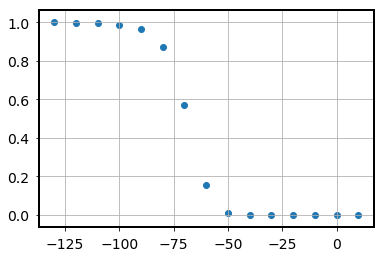

In [11]:
ciao=(max_conductance-np.amin(max_conductance))/(np.amax(max_conductance)-np.amin(max_conductance))
fig = plt.figure()
V=np.linspace(-130,10,15)
plt.scatter(V,ciao)
plt.show()

### Plot IV series

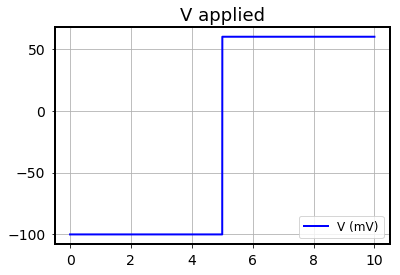

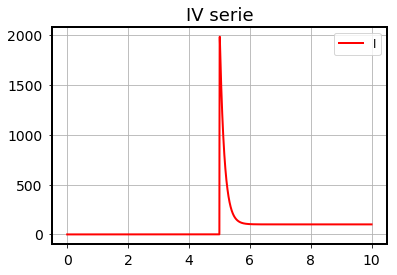

In [5]:
fig = plt.figure()
axes_1= fig.add_subplot(111)
plt.title('V applied')
plt.plot(t, V, 'b-', linewidth=2.0, label="V (mV)")
plt.legend(loc='lower right')
plt.show()

axes = fig.add_subplot(211)
plt.title('IV serie')

plt.plot(t, I, 'r-', linewidth=2.0, label="I")

#axes.set_ylim([-1,1])
axes.set_xlim([4.98,6])

plt.legend(loc='upper right')
plt.show()

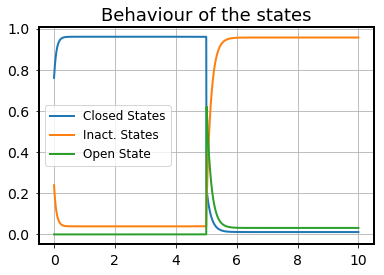

In [6]:
sum_Closed = C[:,0]+C[:,1]+C[:,2]+C[:,3]+C[:,4]
sum_Inactivated = C[:,5]+C[:,6]+C[:,7]+C[:,8]+C[:,9]

fig = plt.figure()
axes_1= fig.add_subplot(111)
plt.title('Behaviour of the states')
    
plt.plot(t, sum_Closed, linewidth=2.0, label="Closed States")
plt.plot(t, sum_Inactivated, linewidth=2.0, label="Inact. States")
plt.plot(t, C[:,10], linewidth=2.0, label="Open State")

plt.legend(loc='center left')
plt.show()

### IV Series V404

In [7]:
Vrest   = -100.0 # mV
Vstep   =  60.0  # mV
Vtest   =  60.0 # mV
Vrepo   =  60.0 # mV
# conductance parameters

#EK      = 0.0    # mV
gK_max  = 20.0     # mS cm^-2

# Assuming no leaking
#EL      = 0.0  # -22.0 # mV
#gL_max  = 0.0    # mS cm^-2

# Membrane capacitance
Cm      = 1.0    # microF cm^-2

# Time of experiments
tini_eq   = 0    # s
tini_prep = 5 # s
tini_test = 10 # s
tini_repo = 10 # s
tend = 10 # s

# Time discretiztion
Npoints = 100000
Points_per_sec = np.int(Npoints/tend) 

# Define Potential function (To be improved if one wants to do IV, deactivation, inactivation or recovery)
V=np.zeros(Npoints)
V[Points_per_sec*tini_eq:Points_per_sec*tini_prep]=Vrest
V[Points_per_sec*tini_prep:Points_per_sec*tend]=Vstep
#V[6000001:10000000]=Vtest
#[10000001]=Vrest

# Guess of initial conditions for the states 

C0_0=0.4390
C1_0=0.2588
C2_0=0.0572
C3_0=0.0056
C4_0=0.0002
I0_0=0.0128
I1_0=0.0553
I2_0=0.0894
I3_0=0.0642
I4_0=0.0172
O_0=0.0001

# Pack up the parameters and initial conditions:

z0 = [C0_0, C1_0, C2_0, C3_0, C4_0, I0_0, I1_0, I2_0, I3_0, I4_0, O_0]

#K = [Vstep,tini_eq, tini_prep, tini_test, tini_repo]

K = [Vrest, Vstep, Vtest, Vrepo, tini_eq, tini_prep, tini_test, tini_repo]

# time array
t = np.linspace(tini_eq,tend,Npoints)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

# Call for the ODE integrator with initial conditions z0 and parameter K
C = odeint(ode_Lin_model_M, z0, t, args=(K,))

# Compute the current proportional to the open channel conductance and potential applied
I = gK_max * C[:,10] * (V[:] - Vrest)

### Plot IV series

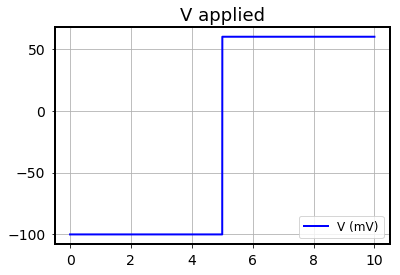

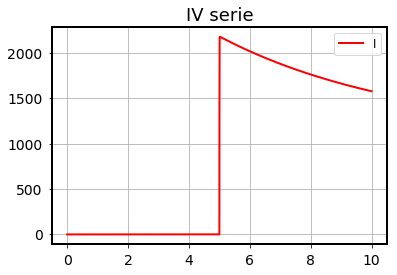

In [8]:
fig = plt.figure()
axes_1= fig.add_subplot(111)
plt.title('V applied')
plt.plot(t, V, 'b-', linewidth=2.0, label="V (mV)")
plt.legend(loc='lower right')
plt.show()

axes = fig.add_subplot(211)
plt.title('IV serie')

plt.plot(t, I, 'r-', linewidth=2.0, label="I")

#axes.set_ylim([-1,1])
axes.set_xlim([4.98,6])

plt.legend(loc='upper right')
plt.show()

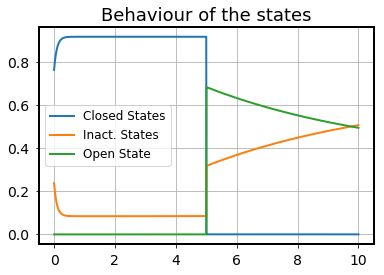

In [9]:
sum_Closed = C[:,0]+C[:,1]+C[:,2]+C[:,3]+C[:,4]
sum_Inactivated = C[:,5]+C[:,6]+C[:,7]+C[:,8]+C[:,9]

fig = plt.figure()
axes_1= fig.add_subplot(111)
plt.title('Behaviour of the states')
    
plt.plot(t, sum_Closed, linewidth=2.0, label="Closed States")
plt.plot(t, sum_Inactivated, linewidth=2.0, label="Inact. States")
plt.plot(t, C[:,10], linewidth=2.0, label="Open State")

plt.legend(loc='center left')
plt.show()

## Deactivation Wild Type

In [10]:
Vrest   =   60.0 # mV
Vstep   =  -100.0  # mV
Vtest   =  -100.0 # mV
Vrepo   =  -100.0 # mV
# conductance parameters

#EK      = 0.0    # mV
gK_max  = 20.0     # mS cm^-2

# Assuming no leaking
#EL      = 0.0  # -22.0 # mV
#gL_max  = 0.0    # mS cm^-2

# Membrane capacitance
Cm      = 1.0    # microF cm^-2

# Time of experiments
tini_eq   = 0    # s
tini_prep = 1 # s
tini_test = 1.02 # s
tini_repo = 2 # s
tend = 2 # s

# Time discretiztion
Npoints = 100000
Points_per_sec = np.int(Npoints/tend) 

# Define Potential function (To be improved if one wants to do IV, deactivation, inactivation or recovery)
V=np.zeros(Npoints)
V[np.int(Points_per_sec * tini_eq):np.int(Points_per_sec * tini_prep)] = Vrest
V[np.int(Points_per_sec * tini_prep):np.int(Points_per_sec * tini_test)] = Vstep
V[np.int(Points_per_sec * tini_test):np.int(Points_per_sec * tini_repo)] = Vtest
#V[Points_per_sec*tini_repo:Points_per_sec*tend]=Vrest

# Guess of initial conditions for the states 

C0_0=0.4390
C1_0=0.2588
C2_0=0.0572
C3_0=0.0056
C4_0=0.0002
I0_0=0.0128
I1_0=0.0553
I2_0=0.0894
I3_0=0.0642
I4_0=0.0172
O_0=0.0001

# Pack up the parameters and initial conditions:

z0 = [C0_0, C1_0, C2_0, C3_0, C4_0, I0_0, I1_0, I2_0, I3_0, I4_0, O_0]

#K = [Vstep,tini_eq, tini_prep, tini_test, tini_repo]

K = [Vrest, Vstep, Vtest, Vrepo, tini_eq, tini_prep, tini_test, tini_repo]

# time array
t = np.linspace(tini_eq,tend,Npoints)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

# Call for the ODE integrator with initial conditions z0 and parameter K
C = odeint(ode_Lin_model_WT, z0, t, args=(K,))

# Compute the current proportional to the open channel conductance and potential applied
I = gK_max * C[:,10] * (V[:] - Vrest)


### Plot Deactivation

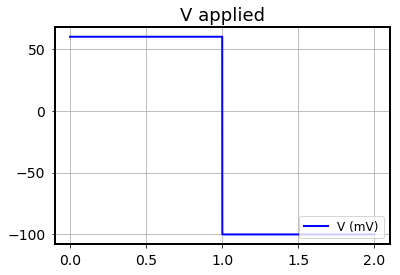

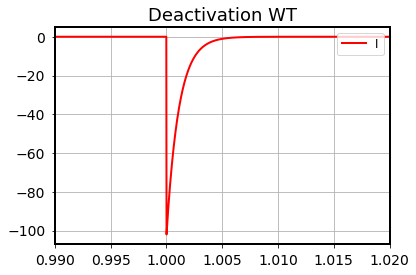

In [11]:
fig = plt.figure()
axes_V= fig.add_subplot(111)
plt.title('V applied')
plt.plot(t, V, 'b-', linewidth=2.0, label="V (mV)")
plt.legend(loc='lower right')
plt.show()

miao = plt.figure()
axes = miao.add_subplot(111)
plt.title('Deactivation WT')

plt.plot(t, I, 'r-', linewidth=2.0, label="I")

#axes.set_ylim([-1,1])
axes.set_xlim([0.99,1.02])

plt.legend(loc='upper right')
plt.show()

## Deactivation Mutated

In [12]:
Vrest   =   60.0 # mV
Vstep   =  -100.0  # mV
Vtest   =  -100.0 # mV
Vrepo   =  -100.0 # mV
# conductance parameters

#EK      = 0.0    # mV
gK_max  = 20.0     # mS cm^-2

# Assuming no leaking
#EL      = 0.0  # -22.0 # mV
#gL_max  = 0.0    # mS cm^-2

# Membrane capacitance
Cm      = 1.0    # microF cm^-2

# Time of experiments
tini_eq   = 0    # s
tini_prep = 1 # s
tini_test = 1.02 # s
tini_repo = 2 # s
tend = 2 # s

# Time discretiztion
Npoints = 100000
Points_per_sec = np.int(Npoints/tend) 

# Define Potential function (To be improved if one wants to do IV, deactivation, inactivation or recovery)
V=np.zeros(Npoints)
V[np.int(Points_per_sec * tini_eq):np.int(Points_per_sec * tini_prep)] = Vrest
V[np.int(Points_per_sec * tini_prep):np.int(Points_per_sec * tini_test)] = Vstep
V[np.int(Points_per_sec * tini_test):np.int(Points_per_sec * tini_repo)] = Vtest
#V[Points_per_sec*tini_repo:Points_per_sec*tend]=Vrest

# Guess of initial conditions for the states 

C0_0=0.4390
C1_0=0.2588
C2_0=0.0572
C3_0=0.0056
C4_0=0.0002
I0_0=0.0128
I1_0=0.0553
I2_0=0.0894
I3_0=0.0642
I4_0=0.0172
O_0=0.0001

# Pack up the parameters and initial conditions:

z0 = [C0_0, C1_0, C2_0, C3_0, C4_0, I0_0, I1_0, I2_0, I3_0, I4_0, O_0]

#K = [Vstep,tini_eq, tini_prep, tini_test, tini_repo]

K = [Vrest, Vstep, Vtest, Vrepo, tini_eq, tini_prep, tini_test, tini_repo]

# time array
t = np.linspace(tini_eq,tend,Npoints)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

# Call for the ODE integrator with initial conditions z0 and parameter K
C = odeint(ode_Lin_model_M, z0, t, args=(K,))

# Compute the current proportional to the open channel conductance and potential applied
I = gK_max * C[:,10] * (V[:] - Vrest)

### Plot Deactivation

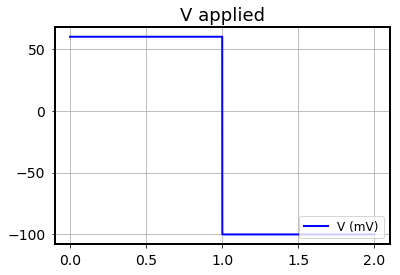

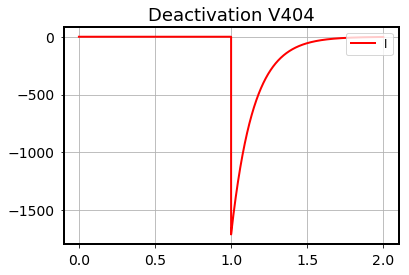

In [13]:
fig = plt.figure()
axes_V= fig.add_subplot(111)
plt.title('V applied')
plt.plot(t, V, 'b-', linewidth=2.0, label="V (mV)")
plt.legend(loc='lower right')
plt.show()

miao = plt.figure()
axes = miao.add_subplot(111)
plt.title('Deactivation V404')

plt.plot(t, I, 'r-', linewidth=2.0, label="I")

#axes.set_ylim([-1,1])
#axes.set_xlim([0.99,1.02])

plt.legend(loc='upper right')
plt.show()

## Inactivation Wild type

In [14]:
Vrest   = -100.0 # mV
Vstep   =  -60.0  # mV
Vtest   =  20.0 # mV
Vrepo   =  -100.0 # mV
# conductance parameters

#EK      = 0.0    # mV
gK_max  = 20.0     # mS cm^-2

# Assuming no leaking
#EL      = 0.0  # -22.0 # mV
#gL_max  = 0.0    # mS cm^-2

# Membrane capacitance
Cm      = 1.0    # microF cm^-2

# Time of experiments
tini_eq   = 0    # s
tini_prep = 0.5 # s
tini_test = 1.0 # s
tini_repo = 1.1 # s
tend = 2.0 # s

# Time discretiztion
Npoints = 100000
Points_per_sec = np.int(Npoints/tend) 

# Define Potential function (To be improved if one wants to do IV, deactivation, inactivation or recovery)
V=np.zeros(Npoints)
V[np.int(Points_per_sec * tini_eq):np.int(Points_per_sec * tini_prep)] = Vrest
V[np.int(Points_per_sec * tini_prep):np.int(Points_per_sec * tini_test)] = Vstep
V[np.int(Points_per_sec * tini_test):np.int(Points_per_sec * tini_repo)] = Vtest
V[np.int(Points_per_sec * tini_repo):np.int(Points_per_sec * tend)] = Vrepo

# Guess of initial conditions for the states 

C0_0=0.4390
C1_0=0.2588
C2_0=0.0572
C3_0=0.0056
C4_0=0.0002
I0_0=0.0128
I1_0=0.0553
I2_0=0.0894
I3_0=0.0642
I4_0=0.0172
O_0=0.0001

# Pack up the parameters and initial conditions:

z0 = [C0_0, C1_0, C2_0, C3_0, C4_0, I0_0, I1_0, I2_0, I3_0, I4_0, O_0]

#K = [Vstep,tini_eq, tini_prep, tini_test, tini_repo]

K = [Vrest, Vstep, Vtest, Vrepo, tini_eq, tini_prep, tini_test, tini_repo]

# time array
t = np.linspace(tini_eq,tend,Npoints)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

# Call for the ODE integrator with initial conditions z0 and parameter K
C = odeint(ode_Lin_model_WT, z0, t, args=(K,))

# Compute the current proportional to the open channel conductance and potential applied
I = gK_max * C[:,10] * (V[:] - Vrest)


### Plot Inactivation

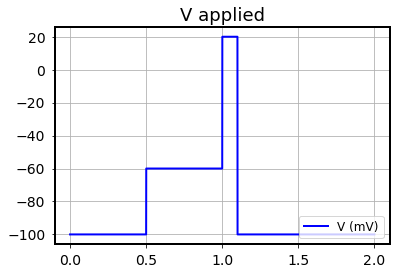

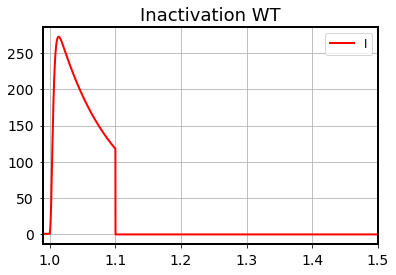

In [15]:
fig = plt.figure()
axes_V= fig.add_subplot(111)
plt.title('V applied')
plt.plot(t, V, 'b-', linewidth=2.0, label="V (mV)")
plt.legend(loc='lower right')
plt.show()

miao = plt.figure()
axes = miao.add_subplot(111)
plt.title('Inactivation WT')

plt.plot(t, I, 'r-', linewidth=2.0, label="I")

#axes.set_ylim([-1,1])
axes.set_xlim([0.99,1.5])

plt.legend(loc='upper right')
plt.show()

## Inactivation V404

In [16]:
Vrest   = -100.0 # mV
Vstep   =  -60.0  # mV
Vtest   =  20.0 # mV
Vrepo   =  -100.0 # mV
# conductance parameters

#EK      = 0.0    # mV
gK_max  = 20.0     # mS cm^-2

# Assuming no leaking
#EL      = 0.0  # -22.0 # mV
#gL_max  = 0.0    # mS cm^-2

# Membrane capacitance
Cm      = 1.0    # microF cm^-2

# Time of experiments
tini_eq   = 0    # s
tini_prep = 0.5 # s
tini_test = 1.0 # s
tini_repo = 1.1 # s
tend = 2.0 # s

# Time discretiztion
Npoints = 100000
Points_per_sec = np.int(Npoints/tend) 

# Define Potential function (To be improved if one wants to do IV, deactivation, inactivation or recovery)
V=np.zeros(Npoints)
V[np.int(Points_per_sec * tini_eq):np.int(Points_per_sec * tini_prep)] = Vrest
V[np.int(Points_per_sec * tini_prep):np.int(Points_per_sec * tini_test)] = Vstep
V[np.int(Points_per_sec * tini_test):np.int(Points_per_sec * tini_repo)] = Vtest
V[np.int(Points_per_sec * tini_repo):np.int(Points_per_sec * tend)] = Vrepo

# Guess of initial conditions for the states 

C0_0=0.4390
C1_0=0.2588
C2_0=0.0572
C3_0=0.0056
C4_0=0.0002
I0_0=0.0128
I1_0=0.0553
I2_0=0.0894
I3_0=0.0642
I4_0=0.0172
O_0=0.0001

# Pack up the parameters and initial conditions:

z0 = [C0_0, C1_0, C2_0, C3_0, C4_0, I0_0, I1_0, I2_0, I3_0, I4_0, O_0]

#K = [Vstep,tini_eq, tini_prep, tini_test, tini_repo]

K = [Vrest, Vstep, Vtest, Vrepo, tini_eq, tini_prep, tini_test, tini_repo]

# time array
t = np.linspace(tini_eq,tend,Npoints)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

# Call for the ODE integrator with initial conditions z0 and parameter K
C = odeint(ode_Lin_model_M, z0, t, args=(K,))

# Compute the current proportional to the open channel conductance and potential applied
I = gK_max * C[:,10] * (V[:] - Vrest)

### Plot Inactivation

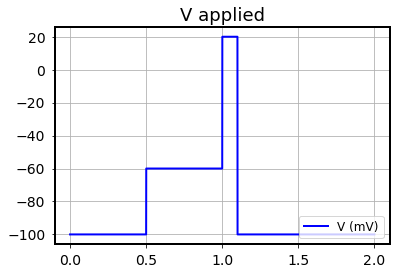

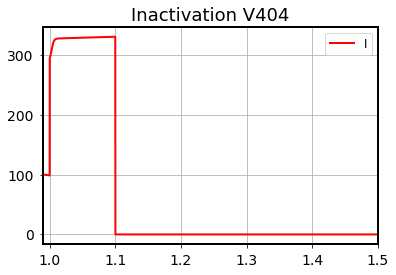

In [17]:
fig = plt.figure()
axes_V= fig.add_subplot(111)
plt.title('V applied')
plt.plot(t, V, 'b-', linewidth=2.0, label="V (mV)")
plt.legend(loc='lower right')
plt.show()

miao = plt.figure()
axes = miao.add_subplot(111)
plt.title('Inactivation V404')

plt.plot(t, I, 'r-', linewidth=2.0, label="I")

#axes.set_ylim([-1,1])
axes.set_xlim([0.99,1.5])

plt.legend(loc='upper right')
plt.show()

## Recovery from Inactivation Wild Type

In [18]:
Vrest   =  -40.0 # mV
Vstep   =  -120.0  # mV
Vtest   =  60.0 # mV
Vrepo   =  -120.0 # mV
# conductance parameters

#EK      = 0.0    # mV
gK_max  = 20.0     # mS cm^-2

# Assuming no leaking
#EL      = 0.0  # -22.0 # mV
#gL_max  = 0.0    # mS cm^-2

# Membrane capacitance
Cm      = 1.0    # microF cm^-2

# Time of experiments
tini_eq   = 0    # s
tini_prep = 0.50 # s
tini_test = 0.51 # s
tini_repo = 0.56 # s
tend = 2.0 # s

# Time discretiztion
Npoints = 100000
Points_per_sec = np.int(Npoints/tend) 

# Define Potential function (To be improved if one wants to do IV, deactivation, inactivation or recovery)
V=np.zeros(Npoints)
V[np.int(Points_per_sec * tini_eq):np.int(Points_per_sec * tini_prep)] = Vrest
V[np.int(Points_per_sec * tini_prep):np.int(Points_per_sec * tini_test)] = Vstep
V[np.int(Points_per_sec * tini_test):np.int(Points_per_sec * tini_repo)] = Vtest
V[np.int(Points_per_sec * tini_repo):np.int(Points_per_sec * tend)] = Vrepo

# Guess of initial conditions for the states 

C0_0=0.4390
C1_0=0.2588
C2_0=0.0572
C3_0=0.0056
C4_0=0.0002
I0_0=0.0128
I1_0=0.0553
I2_0=0.0894
I3_0=0.0642
I4_0=0.0172
O_0=0.0001

# Pack up the parameters and initial conditions:

z0 = [C0_0, C1_0, C2_0, C3_0, C4_0, I0_0, I1_0, I2_0, I3_0, I4_0, O_0]

#K = [Vstep,tini_eq, tini_prep, tini_test, tini_repo]

K = [Vrest, Vstep, Vtest, Vrepo, tini_eq, tini_prep, tini_test, tini_repo]

# time array
t = np.linspace(tini_eq,tend,Npoints)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

# Call for the ODE integrator with initial conditions z0 and parameter K
C = odeint(ode_Lin_model_WT, z0, t, args=(K,))

# Compute the current proportional to the open channel conductance and potential applied
I = gK_max * C[:,10] * (V[:] - Vrest)


### Plot Recovery

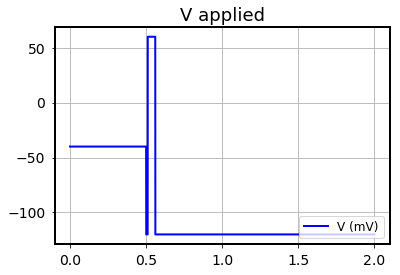

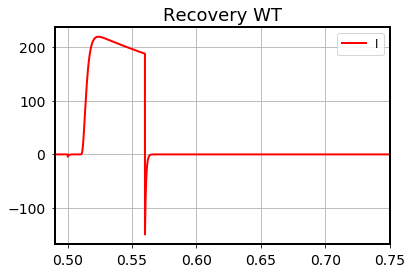

In [19]:
fig = plt.figure()
axes_V= fig.add_subplot(111)
plt.title('V applied')
plt.plot(t, V, 'b-', linewidth=2.0, label="V (mV)")
plt.legend(loc='lower right')
plt.show()

miao = plt.figure()
axes = miao.add_subplot(111)
plt.title('Recovery WT')

plt.plot(t, I, 'r-', linewidth=2.0, label="I")

#axes.set_ylim([-5,5])
axes.set_xlim([0.49,0.75])

plt.legend(loc='upper right')
plt.show()

## Recovery from Inactivation V404

In [22]:
Vrest   =  -60.0 # mV
Vstep   =  -120.0  # mV
Vtest   =  60.0 # mV
Vrepo   =  -120.0 # mV
# conductance parameters

#EK      = 0.0    # mV
gK_max  = 20.0     # mS cm^-2

# Assuming no leaking
#EL      = 0.0  # -22.0 # mV
#gL_max  = 0.0    # mS cm^-2

# Membrane capacitance
Cm      = 1.0    # microF cm^-2

# Time of experiments
tini_eq   = 0    # s
tini_prep = 1.0 # s
tini_test = 1.05 # s
tini_repo = 1.10 # s
tend = 1.60 # s

# Time discretiztion
Npoints = 100000
Points_per_sec = np.int(Npoints/tend) 

# Define Potential function (To be improved if one wants to do IV, deactivation, inactivation or recovery)
V=np.zeros(Npoints)
V[np.int(Points_per_sec * tini_eq):np.int(Points_per_sec * tini_prep)] = Vrest
V[np.int(Points_per_sec * tini_prep):np.int(Points_per_sec * tini_test)] = Vstep
V[np.int(Points_per_sec * tini_test):np.int(Points_per_sec * tini_repo)] = Vtest
V[np.int(Points_per_sec * tini_repo):np.int(Points_per_sec * tend)] = Vrepo

# Guess of initial conditions for the states 

C0_0=0.4390
C1_0=0.2588
C2_0=0.0572
C3_0=0.0056
C4_0=0.0002
I0_0=0.0128
I1_0=0.0553
I2_0=0.0894
I3_0=0.0642
I4_0=0.0172
O_0=0.0001

# Pack up the parameters and initial conditions:

z0 = [C0_0, C1_0, C2_0, C3_0, C4_0, I0_0, I1_0, I2_0, I3_0, I4_0, O_0]

#K = [Vstep,tini_eq, tini_prep, tini_test, tini_repo]

K = [Vrest, Vstep, Vtest, Vrepo, tini_eq, tini_prep, tini_test, tini_repo]

# time array
t = np.linspace(tini_eq,tend,Npoints)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

# Call for the ODE integrator with initial conditions z0 and parameter K
C = odeint(ode_Lin_model_M, z0, t, args=(K,))

# Compute the current proportional to the open channel conductance and potential applied
I = gK_max * C[:,10] * (V[:] - Vrest)

### Plot Recovery

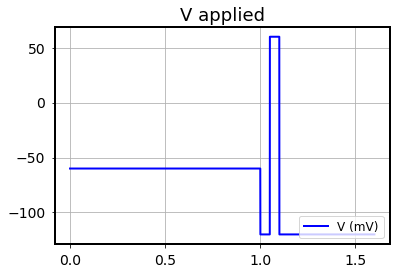

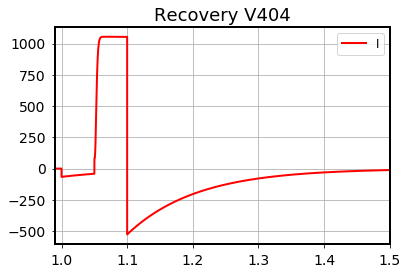

In [23]:
fig = plt.figure()
axes_V= fig.add_subplot(111)
plt.title('V applied')
plt.plot(t, V, 'b-', linewidth=2.0, label="V (mV)")
plt.legend(loc='lower right')
plt.show()

miao = plt.figure()
axes = miao.add_subplot(111)
plt.title('Recovery V404')

plt.plot(t, I, 'r-', linewidth=2.0, label="I")

#axes.set_ylim([-1,1])
axes.set_xlim([0.99,1.5])

plt.legend(loc='upper right')
plt.show()